In [0]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import cv2
import sys
import glob

In [0]:
pat = "G:/Python_Data/Senitment_data/참가자정보.xlsx"
data_pe = pd.read_excel(pat, index=False)
data_pe.set_index("번호")

,성별,나이
번호,,
0,남,28
1,여,34
2,남,21
3,여,24
4,남,20
...,...,...
95,여,33
96,여,42
97,여,32


In [0]:
Image = []
for root, dirs, files in os.walk("G:/Python_Data/Senitment_data/picture/"):
    Image.append(files)
Image = Image[0]

In [0]:
path = []
for i in range(0, len(Image)):
    path.append("G:/Python_Data/Senitment_data/picture/" + Image[i])

In [0]:
data = pd.DataFrame({"Path":path, "Image":Image})
data.head()

,Path,Image
0,G:/Python_Data/Senitment_data/picture/000-ang-...,000-ang-00.JPG
1,G:/Python_Data/Senitment_data/picture/000-ang-...,000-ang-01.JPG
2,G:/Python_Data/Senitment_data/picture/000-ang-...,000-ang-02.JPG
3,G:/Python_Data/Senitment_data/picture/000-ang-...,000-ang-03.JPG
4,G:/Python_Data/Senitment_data/picture/000-ang-...,000-ang-04.JPG


### 이미지 불러오기

In [0]:
img = cv2.imread(data["Path"][4000]).reshape(-1,1080,1920,3)
img.shape

(1, 1080, 1920, 3)

In [0]:
for i in range(4001, len(data["Path"])):
    temp = cv2.imread(data["Path"][i]).reshape(-1,1080,1920,3)
    img= np.vstack([img, temp])
    print(img.shape)

In [0]:
gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY).reshape(-1,1080,1920)

for i in range(1, len(img)):
    g = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY).reshape(-1,1080,1920)
    gray = np.vstack([gray, g])
    print(gray.shape)

In [0]:
gray.shape

(906, 1080, 1920)

## 파일 중간 저장

In [0]:
np.save("F:/Python_Data/Senitment_data/File/gray_ary_5.npy", gray)

In [0]:
gray_ary_5 = np.load("F:/Python_Data/Senitment_data/File/gray_ary_5.npy")

In [0]:
gray_ary_5.shape

(906, 1080, 1920)

## 전체사진 불러오기

In [0]:
gray_ary_1 = np.load("G:/Python_Data/Senitment_data/File/gray_ary_1.npy")
#gray_ary_2 = np.load("G:/Python_Data/Senitment_data/File/gray_ary_2.npy")
#gray_ary_3 = np.load("G:/Python_Data/Senitment_data/File/gray_ary_3.npy")
#gray_ary_4 = np.load("G:/Python_Data/Senitment_data/File/gray_ary_4.npy")
#gray_ary_5 = np.load("G:/Python_Data/Senitment_data/File/gray_ary_5.npy")

## 얼굴 사진만 찾아 자르기

In [0]:
na = data["Path"].apply(lambda x : x.split("/")[4])
na[1000]

'019-hap-03.JPG'

In [0]:
face_cascade = cv2.CascadeClassifier('C:/Users/1-6/Downloads/OpenCV_FaceCascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/1-6/Downloads/OpenCV_FaceCascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_ary_1[0], scaleFactor=1.02, minNeighbors=6, minSize=(320,320))
for(x,y, w,h)in faces:
    gray = cv2.rectangle(gray_ary_1[0], (x,y), (x+w, y+h), (255,0,0),2) #사각형 범위
    rec_gray = gray[y:y+h, x:x+w]
    print(rec_gray.shape)

(485, 485)


In [0]:
for i in range(0, len(gray_ary_5)):
    faces = face_cascade.detectMultiScale(gray_ary_5[i], scaleFactor=1.02, minNeighbors=7, minSize=(320,320))
    for(x,y, w,h)in faces:
        gray = cv2.rectangle(gray_ary_5[i], (x,y), (x+w, y+h), (255,0,0),2) #사각형 범위
        rec_gray = gray[y:y+h, x:x+w]
        cv2.imwrite('F:/Python_Data/Senitment_data/rec_picture/{}'.format(na[i+4000]), rec_gray)

## Data Handling

In [0]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import sys
import glob
import os

In [0]:
Image = []
for root, dirs, files in os.walk("G:/Python_Data/Senitment_data/picture_50x50/"):
    Image.append(files)
Image = Image[0]

In [0]:
path = 'G:/Python_Data/Senitment_data/picture_50x50'

files = [f for f in sorted(glob.glob(path + "**/*.jpg", recursive=True))]
print(len(files))

4792


In [0]:
data_rec = pd.DataFrame({"Path":files, "Image":Image})
data_rec.shape

(4792, 2)

In [0]:
# 분리
data_rec["idx"] = data_rec["Image"].apply(lambda x : x.split("-")[0][1:])
data_rec["idx"][:557] = data_rec["idx"][:557].apply(lambda x : x[1])
data_rec["idx"] = data_rec["idx"].apply(lambda x : int(x))

# data와 data_pe를 합친다
data_rec = pd.merge(data_rec, data_pe, how ="right", left_on = "idx", right_on ="번호")

# Emotion으로 옮긴다
data_rec["Emotion"] = data_rec["Image"].apply(lambda x : x.split("-")[1])

# 사진 조도에 따른 칼럼을 생성
data_rec["light"] = data_rec["idx"].apply(lambda x : 1 if x < 41 else 0)

# 나이 35살을 기준으로 0, 1 범주화
data_rec["Age"] = data_pe["나이"].apply(lambda x : 0 if x < 36 else 1)

In [0]:
data_rec.head()

,Path,Image,idx,번호,성별,나이,Emotion,light,Age
0,G:/Python_Data/Senitment_data\picture_50x50\00...,000-ang-00.JPG,0,0,남,28,ang,1,0.0
1,G:/Python_Data/Senitment_data\picture_50x50\00...,000-ang-01.JPG,0,0,남,28,ang,1,0.0
2,G:/Python_Data/Senitment_data\picture_50x50\00...,000-ang-02.JPG,0,0,남,28,ang,1,0.0
3,G:/Python_Data/Senitment_data\picture_50x50\00...,000-ang-03.JPG,0,0,남,28,ang,1,0.0
4,G:/Python_Data/Senitment_data\picture_50x50\00...,000-ang-04.JPG,0,0,남,28,ang,1,0.0


In [0]:
# LabelEncoder
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(data_rec["성별"])
s_encoded = encoder.transform(data_rec["성별"])
data_rec["Sex"] = s_encoded

encoder.fit(data_rec["Emotion"])
e_encoded = encoder.transform(data_rec["Emotion"])
data_rec["Emotion"] = e_encoded

In [0]:
data_rec = data_rec[["Path", "Sex", "나이", "light", "Emotion"]]
print(data_rec.shape)
data_rec.head()

(4792, 5)


,Path,Sex,나이,light,Emotion
0,G:/Python_Data/Senitment_data\picture_50x50\00...,0,28,1,0
1,G:/Python_Data/Senitment_data\picture_50x50\00...,0,28,1,0
2,G:/Python_Data/Senitment_data\picture_50x50\00...,0,28,1,0
3,G:/Python_Data/Senitment_data\picture_50x50\00...,0,28,1,0
4,G:/Python_Data/Senitment_data\picture_50x50\00...,0,28,1,0


### 사진 벡터화

- 얼굴사진 벡터

In [0]:
face_50_img = cv2.imread(data_rec["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

for i in range(1, len(data_rec["Path"])):
    temp = cv2.imread(data_rec["Path"][i], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
    face_50_img = np.vstack([face_50_img, temp])
    print(face_50_img.shape)
np.save("G:/Python_Data/Senitment_data/File/face_50_img.npy", face_50_img)

(2, 64, 64)
(3, 64, 64)
(4, 64, 64)
(5, 64, 64)
(6, 64, 64)
(7, 64, 64)
(8, 64, 64)
(9, 64, 64)
(10, 64, 64)
(11, 64, 64)
(12, 64, 64)
(13, 64, 64)
(14, 64, 64)
(15, 64, 64)
(16, 64, 64)
(17, 64, 64)
(18, 64, 64)
(19, 64, 64)
(20, 64, 64)
(21, 64, 64)
(22, 64, 64)
(23, 64, 64)
(24, 64, 64)
(25, 64, 64)
(26, 64, 64)
(27, 64, 64)
(28, 64, 64)
(29, 64, 64)
(30, 64, 64)
(31, 64, 64)
(32, 64, 64)
(33, 64, 64)
(34, 64, 64)
(35, 64, 64)
(36, 64, 64)
(37, 64, 64)
(38, 64, 64)
(39, 64, 64)
(40, 64, 64)
(41, 64, 64)
(42, 64, 64)
(43, 64, 64)
(44, 64, 64)
(45, 64, 64)
(46, 64, 64)
(47, 64, 64)
(48, 64, 64)
(49, 64, 64)
(50, 64, 64)
(51, 64, 64)
(52, 64, 64)
(53, 64, 64)
(54, 64, 64)
(55, 64, 64)
(56, 64, 64)
(57, 64, 64)
(58, 64, 64)
(59, 64, 64)
(60, 64, 64)
(61, 64, 64)
(62, 64, 64)
(63, 64, 64)
(64, 64, 64)
(65, 64, 64)
(66, 64, 64)
(67, 64, 64)
(68, 64, 64)
(69, 64, 64)
(70, 64, 64)
(71, 64, 64)
(72, 64, 64)
(73, 64, 64)
(74, 64, 64)
(75, 64, 64)
(76, 64, 64)
(77, 64, 64)
(78, 64, 64)
(79, 64

(789, 64, 64)
(790, 64, 64)
(791, 64, 64)
(792, 64, 64)
(793, 64, 64)
(794, 64, 64)
(795, 64, 64)
(796, 64, 64)
(797, 64, 64)
(798, 64, 64)
(799, 64, 64)
(800, 64, 64)
(801, 64, 64)
(802, 64, 64)
(803, 64, 64)
(804, 64, 64)
(805, 64, 64)
(806, 64, 64)
(807, 64, 64)
(808, 64, 64)
(809, 64, 64)
(810, 64, 64)
(811, 64, 64)
(812, 64, 64)
(813, 64, 64)
(814, 64, 64)
(815, 64, 64)
(816, 64, 64)
(817, 64, 64)
(818, 64, 64)
(819, 64, 64)
(820, 64, 64)
(821, 64, 64)
(822, 64, 64)
(823, 64, 64)
(824, 64, 64)
(825, 64, 64)
(826, 64, 64)
(827, 64, 64)
(828, 64, 64)
(829, 64, 64)
(830, 64, 64)
(831, 64, 64)
(832, 64, 64)
(833, 64, 64)
(834, 64, 64)
(835, 64, 64)
(836, 64, 64)
(837, 64, 64)
(838, 64, 64)
(839, 64, 64)
(840, 64, 64)
(841, 64, 64)
(842, 64, 64)
(843, 64, 64)
(844, 64, 64)
(845, 64, 64)
(846, 64, 64)
(847, 64, 64)
(848, 64, 64)
(849, 64, 64)
(850, 64, 64)
(851, 64, 64)
(852, 64, 64)
(853, 64, 64)
(854, 64, 64)
(855, 64, 64)
(856, 64, 64)
(857, 64, 64)
(858, 64, 64)
(859, 64, 64)
(860, 

(1389, 64, 64)
(1390, 64, 64)
(1391, 64, 64)
(1392, 64, 64)
(1393, 64, 64)
(1394, 64, 64)
(1395, 64, 64)
(1396, 64, 64)
(1397, 64, 64)
(1398, 64, 64)
(1399, 64, 64)
(1400, 64, 64)
(1401, 64, 64)
(1402, 64, 64)
(1403, 64, 64)
(1404, 64, 64)
(1405, 64, 64)
(1406, 64, 64)
(1407, 64, 64)
(1408, 64, 64)
(1409, 64, 64)
(1410, 64, 64)
(1411, 64, 64)
(1412, 64, 64)
(1413, 64, 64)
(1414, 64, 64)
(1415, 64, 64)
(1416, 64, 64)
(1417, 64, 64)
(1418, 64, 64)
(1419, 64, 64)
(1420, 64, 64)
(1421, 64, 64)
(1422, 64, 64)
(1423, 64, 64)
(1424, 64, 64)
(1425, 64, 64)
(1426, 64, 64)
(1427, 64, 64)
(1428, 64, 64)
(1429, 64, 64)
(1430, 64, 64)
(1431, 64, 64)
(1432, 64, 64)
(1433, 64, 64)
(1434, 64, 64)
(1435, 64, 64)
(1436, 64, 64)
(1437, 64, 64)
(1438, 64, 64)
(1439, 64, 64)
(1440, 64, 64)
(1441, 64, 64)
(1442, 64, 64)
(1443, 64, 64)
(1444, 64, 64)
(1445, 64, 64)
(1446, 64, 64)
(1447, 64, 64)
(1448, 64, 64)
(1449, 64, 64)
(1450, 64, 64)
(1451, 64, 64)
(1452, 64, 64)
(1453, 64, 64)
(1454, 64, 64)
(1455, 64,

(1942, 64, 64)
(1943, 64, 64)
(1944, 64, 64)
(1945, 64, 64)
(1946, 64, 64)
(1947, 64, 64)
(1948, 64, 64)
(1949, 64, 64)
(1950, 64, 64)
(1951, 64, 64)
(1952, 64, 64)
(1953, 64, 64)
(1954, 64, 64)
(1955, 64, 64)
(1956, 64, 64)
(1957, 64, 64)
(1958, 64, 64)
(1959, 64, 64)
(1960, 64, 64)
(1961, 64, 64)
(1962, 64, 64)
(1963, 64, 64)
(1964, 64, 64)
(1965, 64, 64)
(1966, 64, 64)
(1967, 64, 64)
(1968, 64, 64)
(1969, 64, 64)
(1970, 64, 64)
(1971, 64, 64)
(1972, 64, 64)
(1973, 64, 64)
(1974, 64, 64)
(1975, 64, 64)
(1976, 64, 64)
(1977, 64, 64)
(1978, 64, 64)
(1979, 64, 64)
(1980, 64, 64)
(1981, 64, 64)
(1982, 64, 64)
(1983, 64, 64)
(1984, 64, 64)
(1985, 64, 64)
(1986, 64, 64)
(1987, 64, 64)
(1988, 64, 64)
(1989, 64, 64)
(1990, 64, 64)
(1991, 64, 64)
(1992, 64, 64)
(1993, 64, 64)
(1994, 64, 64)
(1995, 64, 64)
(1996, 64, 64)
(1997, 64, 64)
(1998, 64, 64)
(1999, 64, 64)
(2000, 64, 64)
(2001, 64, 64)
(2002, 64, 64)
(2003, 64, 64)
(2004, 64, 64)
(2005, 64, 64)
(2006, 64, 64)
(2007, 64, 64)
(2008, 64,

(2526, 64, 64)
(2527, 64, 64)
(2528, 64, 64)
(2529, 64, 64)
(2530, 64, 64)
(2531, 64, 64)
(2532, 64, 64)
(2533, 64, 64)
(2534, 64, 64)
(2535, 64, 64)
(2536, 64, 64)
(2537, 64, 64)
(2538, 64, 64)
(2539, 64, 64)
(2540, 64, 64)
(2541, 64, 64)
(2542, 64, 64)
(2543, 64, 64)
(2544, 64, 64)
(2545, 64, 64)
(2546, 64, 64)
(2547, 64, 64)
(2548, 64, 64)
(2549, 64, 64)
(2550, 64, 64)
(2551, 64, 64)
(2552, 64, 64)
(2553, 64, 64)
(2554, 64, 64)
(2555, 64, 64)
(2556, 64, 64)
(2557, 64, 64)
(2558, 64, 64)
(2559, 64, 64)
(2560, 64, 64)
(2561, 64, 64)
(2562, 64, 64)
(2563, 64, 64)
(2564, 64, 64)
(2565, 64, 64)
(2566, 64, 64)
(2567, 64, 64)
(2568, 64, 64)
(2569, 64, 64)
(2570, 64, 64)
(2571, 64, 64)
(2572, 64, 64)
(2573, 64, 64)
(2574, 64, 64)
(2575, 64, 64)
(2576, 64, 64)
(2577, 64, 64)
(2578, 64, 64)
(2579, 64, 64)
(2580, 64, 64)
(2581, 64, 64)
(2582, 64, 64)
(2583, 64, 64)
(2584, 64, 64)
(2585, 64, 64)
(2586, 64, 64)
(2587, 64, 64)
(2588, 64, 64)
(2589, 64, 64)
(2590, 64, 64)
(2591, 64, 64)
(2592, 64,

(3122, 64, 64)
(3123, 64, 64)
(3124, 64, 64)
(3125, 64, 64)
(3126, 64, 64)
(3127, 64, 64)
(3128, 64, 64)
(3129, 64, 64)
(3130, 64, 64)
(3131, 64, 64)
(3132, 64, 64)
(3133, 64, 64)
(3134, 64, 64)
(3135, 64, 64)
(3136, 64, 64)
(3137, 64, 64)
(3138, 64, 64)
(3139, 64, 64)
(3140, 64, 64)
(3141, 64, 64)
(3142, 64, 64)
(3143, 64, 64)
(3144, 64, 64)
(3145, 64, 64)
(3146, 64, 64)
(3147, 64, 64)
(3148, 64, 64)
(3149, 64, 64)
(3150, 64, 64)
(3151, 64, 64)
(3152, 64, 64)
(3153, 64, 64)
(3154, 64, 64)
(3155, 64, 64)
(3156, 64, 64)
(3157, 64, 64)
(3158, 64, 64)
(3159, 64, 64)
(3160, 64, 64)
(3161, 64, 64)
(3162, 64, 64)
(3163, 64, 64)
(3164, 64, 64)
(3165, 64, 64)
(3166, 64, 64)
(3167, 64, 64)
(3168, 64, 64)
(3169, 64, 64)
(3170, 64, 64)
(3171, 64, 64)
(3172, 64, 64)
(3173, 64, 64)
(3174, 64, 64)
(3175, 64, 64)
(3176, 64, 64)
(3177, 64, 64)
(3178, 64, 64)
(3179, 64, 64)
(3180, 64, 64)
(3181, 64, 64)
(3182, 64, 64)
(3183, 64, 64)
(3184, 64, 64)
(3185, 64, 64)
(3186, 64, 64)
(3187, 64, 64)
(3188, 64,

(3697, 64, 64)
(3698, 64, 64)
(3699, 64, 64)
(3700, 64, 64)
(3701, 64, 64)
(3702, 64, 64)
(3703, 64, 64)
(3704, 64, 64)
(3705, 64, 64)
(3706, 64, 64)
(3707, 64, 64)
(3708, 64, 64)
(3709, 64, 64)
(3710, 64, 64)
(3711, 64, 64)
(3712, 64, 64)
(3713, 64, 64)
(3714, 64, 64)
(3715, 64, 64)
(3716, 64, 64)
(3717, 64, 64)
(3718, 64, 64)
(3719, 64, 64)
(3720, 64, 64)
(3721, 64, 64)
(3722, 64, 64)
(3723, 64, 64)
(3724, 64, 64)
(3725, 64, 64)
(3726, 64, 64)
(3727, 64, 64)
(3728, 64, 64)
(3729, 64, 64)
(3730, 64, 64)
(3731, 64, 64)
(3732, 64, 64)
(3733, 64, 64)
(3734, 64, 64)
(3735, 64, 64)
(3736, 64, 64)
(3737, 64, 64)
(3738, 64, 64)
(3739, 64, 64)
(3740, 64, 64)
(3741, 64, 64)
(3742, 64, 64)
(3743, 64, 64)
(3744, 64, 64)
(3745, 64, 64)
(3746, 64, 64)
(3747, 64, 64)
(3748, 64, 64)
(3749, 64, 64)
(3750, 64, 64)
(3751, 64, 64)
(3752, 64, 64)
(3753, 64, 64)
(3754, 64, 64)
(3755, 64, 64)
(3756, 64, 64)
(3757, 64, 64)
(3758, 64, 64)
(3759, 64, 64)
(3760, 64, 64)
(3761, 64, 64)
(3762, 64, 64)
(3763, 64,

(4246, 64, 64)
(4247, 64, 64)
(4248, 64, 64)
(4249, 64, 64)
(4250, 64, 64)
(4251, 64, 64)
(4252, 64, 64)
(4253, 64, 64)
(4254, 64, 64)
(4255, 64, 64)
(4256, 64, 64)
(4257, 64, 64)
(4258, 64, 64)
(4259, 64, 64)
(4260, 64, 64)
(4261, 64, 64)
(4262, 64, 64)
(4263, 64, 64)
(4264, 64, 64)
(4265, 64, 64)
(4266, 64, 64)
(4267, 64, 64)
(4268, 64, 64)
(4269, 64, 64)
(4270, 64, 64)
(4271, 64, 64)
(4272, 64, 64)
(4273, 64, 64)
(4274, 64, 64)
(4275, 64, 64)
(4276, 64, 64)
(4277, 64, 64)
(4278, 64, 64)
(4279, 64, 64)
(4280, 64, 64)
(4281, 64, 64)
(4282, 64, 64)
(4283, 64, 64)
(4284, 64, 64)
(4285, 64, 64)
(4286, 64, 64)
(4287, 64, 64)
(4288, 64, 64)
(4289, 64, 64)
(4290, 64, 64)
(4291, 64, 64)
(4292, 64, 64)
(4293, 64, 64)
(4294, 64, 64)
(4295, 64, 64)
(4296, 64, 64)
(4297, 64, 64)
(4298, 64, 64)
(4299, 64, 64)
(4300, 64, 64)
(4301, 64, 64)
(4302, 64, 64)
(4303, 64, 64)
(4304, 64, 64)
(4305, 64, 64)
(4306, 64, 64)
(4307, 64, 64)
(4308, 64, 64)
(4309, 64, 64)
(4310, 64, 64)
(4311, 64, 64)
(4312, 64,

#### 남자, 여자, 밝기에 따른 사진나누기

In [0]:
ang_man_light = data_rec[(data_rec["Emotion"] == 0) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
ang_man_unlight = data_rec[(data_rec["Emotion"] == 0) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
ang_girl_light = data_rec[(data_rec["Emotion"] == 0) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
ang_girl_unlight = data_rec[(data_rec["Emotion"] == 0) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()


dis_man_light = data_rec[(data_rec["Emotion"] == 1) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
dis_man_unlight = data_rec[(data_rec["Emotion"] == 1) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
dis_girl_light = data_rec[(data_rec["Emotion"] == 1) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
dis_girl_unlight = data_rec[(data_rec["Emotion"] == 1) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()


fea_man_light = data_rec[(data_rec["Emotion"] == 2) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
fea_man_unlight = data_rec[(data_rec["Emotion"] == 2) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
fea_girl_light = data_rec[(data_rec["Emotion"] == 2) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
fea_girl_unlight = data_rec[(data_rec["Emotion"] == 2) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()


hap_man_light = data_rec[(data_rec["Emotion"] == 3) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
hap_girl_light = data_rec[(data_rec["Emotion"] == 3) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
hap_man_unlight = data_rec[(data_rec["Emotion"] == 3) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
hap_girl_unlight = data_rec[(data_rec["Emotion"] == 3) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()


neu_man_light = data_rec[(data_rec["Emotion"] == 4) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
neu_girl_light = data_rec[(data_rec["Emotion"] == 4) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
neu_man_unlight = data_rec[(data_rec["Emotion"] == 4) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
neu_girl_unlight = data_rec[(data_rec["Emotion"] == 4) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()


sad_man_light = data_rec[(data_rec["Emotion"] == 5) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
sad_girl_light = data_rec[(data_rec["Emotion"] == 5) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
sad_man_unlight = data_rec[(data_rec["Emotion"] == 5) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
sad_girl_unlight = data_rec[(data_rec["Emotion"] == 5) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()


sur_man_light = data_rec[(data_rec["Emotion"] == 6) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 1)].reset_index()
sur_girl_light = data_rec[(data_rec["Emotion"] == 6) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 1)].reset_index()
sur_man_unlight = data_rec[(data_rec["Emotion"] == 6) & (data_rec["Sex"] == 0.0) & (data_rec["light"] == 0)].reset_index()
sur_girl_unlight = data_rec[(data_rec["Emotion"] == 6) & (data_rec["Sex"] == 1.0) & (data_rec["light"] == 0)].reset_index()

In [0]:
ang_man_light_img = cv2.imread(ang_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
ang_man_unlight_img = cv2.imread(ang_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
ang_girl_light_img = cv2.imread(ang_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
ang_girl_unlight_img = cv2.imread(ang_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

dis_man_light_img = cv2.imread(dis_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
dis_man_unlight_img = cv2.imread(dis_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
dis_girl_light_img = cv2.imread(dis_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
dis_girl_unlight_img = cv2.imread(dis_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

fea_man_light_img = cv2.imread(fea_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
fea_man_unlight_img = cv2.imread(fea_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
fea_girl_light_img = cv2.imread(fea_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
fea_girl_unlight_img = cv2.imread(fea_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

hap_man_light_img = cv2.imread(hap_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
hap_man_unlight_img = cv2.imread(hap_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
hap_girl_light_img = cv2.imread(hap_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
hap_girl_unlight_img = cv2.imread(hap_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

neu_man_light_img = cv2.imread(neu_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-164,64)
neu_man_unlight_img = cv2.imread(neu_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
neu_girl_light_img = cv2.imread(neu_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
neu_girl_unlight_img = cv2.imread(neu_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

sad_man_light_img = cv2.imread(sad_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sad_man_unlight_img = cv2.imread(sad_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sad_girl_light_img = cv2.imread(sad_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sad_girl_unlight_img = cv2.imread(sad_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

sur_man_light_img = cv2.imread(sur_man_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sur_man_unlight_img = cv2.imread(sur_man_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sur_girl_light_img = cv2.imread(sur_girl_light["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)
sur_girl_unlight_img = cv2.imread(sur_girl_unlight["Path"][0], cv2.IMREAD_GRAYSCALE).reshape(-1,64,64)

In [0]:
for i in range(1, len(sur_man_light["Path"])):
    temp = cv2.imread(sur_man_light["Path"][i]).reshape(-1,64,64)
    sur_man_light_img = np.vstack([sur_man_light_img, temp])
    print(sur_man_light_img.shape)
np.save("G:/Python_Data/Senitment_data/File/sur_man_light_img.npy", sur_man_light_img)

(2, 600, 600, 3)
(3, 600, 600, 3)
(4, 600, 600, 3)
(5, 600, 600, 3)
(6, 600, 600, 3)
(7, 600, 600, 3)
(8, 600, 600, 3)
(9, 600, 600, 3)
(10, 600, 600, 3)
(11, 600, 600, 3)
(12, 600, 600, 3)
(13, 600, 600, 3)
(14, 600, 600, 3)
(15, 600, 600, 3)
(16, 600, 600, 3)
(17, 600, 600, 3)
(18, 600, 600, 3)
(19, 600, 600, 3)
(20, 600, 600, 3)
(21, 600, 600, 3)
(22, 600, 600, 3)
(23, 600, 600, 3)
(24, 600, 600, 3)
(25, 600, 600, 3)
(26, 600, 600, 3)
(27, 600, 600, 3)
(28, 600, 600, 3)
(29, 600, 600, 3)
(30, 600, 600, 3)
(31, 600, 600, 3)
(32, 600, 600, 3)
(33, 600, 600, 3)
(34, 600, 600, 3)
(35, 600, 600, 3)
(36, 600, 600, 3)
(37, 600, 600, 3)
(38, 600, 600, 3)
(39, 600, 600, 3)
(40, 600, 600, 3)
(41, 600, 600, 3)
(42, 600, 600, 3)
(43, 600, 600, 3)
(44, 600, 600, 3)
(45, 600, 600, 3)
(46, 600, 600, 3)
(47, 600, 600, 3)
(48, 600, 600, 3)
(49, 600, 600, 3)
(50, 600, 600, 3)
(51, 600, 600, 3)
(52, 600, 600, 3)
(53, 600, 600, 3)
(54, 600, 600, 3)
(55, 600, 600, 3)
(56, 600, 600, 3)
(57, 600, 600, 3)


In [0]:
for i in range(1, len(sur_man_unlight["Path"])):
    temp = cv2.imread(sur_man_unlight["Path"][i]).reshape(-1,64,64)
    sur_man_unlight_img = np.vstack([sur_man_unlight_img, temp])
    print(sur_man_unlight_img.shape)
np.save("G:/Python_Data/Senitment_data/File/sur_man_unlight_img.npy", sur_man_unlight_img)

(2, 600, 600, 3)
(3, 600, 600, 3)
(4, 600, 600, 3)
(5, 600, 600, 3)
(6, 600, 600, 3)
(7, 600, 600, 3)
(8, 600, 600, 3)
(9, 600, 600, 3)
(10, 600, 600, 3)
(11, 600, 600, 3)
(12, 600, 600, 3)
(13, 600, 600, 3)
(14, 600, 600, 3)
(15, 600, 600, 3)
(16, 600, 600, 3)
(17, 600, 600, 3)
(18, 600, 600, 3)
(19, 600, 600, 3)
(20, 600, 600, 3)
(21, 600, 600, 3)
(22, 600, 600, 3)
(23, 600, 600, 3)
(24, 600, 600, 3)
(25, 600, 600, 3)
(26, 600, 600, 3)
(27, 600, 600, 3)
(28, 600, 600, 3)
(29, 600, 600, 3)
(30, 600, 600, 3)
(31, 600, 600, 3)
(32, 600, 600, 3)
(33, 600, 600, 3)
(34, 600, 600, 3)
(35, 600, 600, 3)
(36, 600, 600, 3)
(37, 600, 600, 3)
(38, 600, 600, 3)
(39, 600, 600, 3)
(40, 600, 600, 3)
(41, 600, 600, 3)
(42, 600, 600, 3)
(43, 600, 600, 3)
(44, 600, 600, 3)
(45, 600, 600, 3)
(46, 600, 600, 3)
(47, 600, 600, 3)
(48, 600, 600, 3)
(49, 600, 600, 3)
(50, 600, 600, 3)
(51, 600, 600, 3)
(52, 600, 600, 3)
(53, 600, 600, 3)
(54, 600, 600, 3)
(55, 600, 600, 3)
(56, 600, 600, 3)
(57, 600, 600, 3)


In [0]:
for i in range(1, len(sur_girl_light["Path"])):
    temp = cv2.imread(sur_girl_light["Path"][i]).reshape(-1,64,64)
    sur_girl_light_img= np.vstack([sur_girl_light_img, temp])
    print(sur_girl_light_img.shape)
np.save("G:/Python_Data/Senitment_data/File/sur_girl_light_img.npy", sur_girl_light_img)

(2, 600, 600, 3)
(3, 600, 600, 3)
(4, 600, 600, 3)
(5, 600, 600, 3)
(6, 600, 600, 3)
(7, 600, 600, 3)
(8, 600, 600, 3)
(9, 600, 600, 3)
(10, 600, 600, 3)
(11, 600, 600, 3)
(12, 600, 600, 3)
(13, 600, 600, 3)
(14, 600, 600, 3)
(15, 600, 600, 3)
(16, 600, 600, 3)
(17, 600, 600, 3)
(18, 600, 600, 3)
(19, 600, 600, 3)
(20, 600, 600, 3)
(21, 600, 600, 3)
(22, 600, 600, 3)
(23, 600, 600, 3)
(24, 600, 600, 3)
(25, 600, 600, 3)
(26, 600, 600, 3)
(27, 600, 600, 3)
(28, 600, 600, 3)
(29, 600, 600, 3)
(30, 600, 600, 3)
(31, 600, 600, 3)
(32, 600, 600, 3)
(33, 600, 600, 3)
(34, 600, 600, 3)
(35, 600, 600, 3)
(36, 600, 600, 3)
(37, 600, 600, 3)
(38, 600, 600, 3)
(39, 600, 600, 3)
(40, 600, 600, 3)
(41, 600, 600, 3)
(42, 600, 600, 3)
(43, 600, 600, 3)
(44, 600, 600, 3)
(45, 600, 600, 3)
(46, 600, 600, 3)
(47, 600, 600, 3)
(48, 600, 600, 3)
(49, 600, 600, 3)
(50, 600, 600, 3)
(51, 600, 600, 3)
(52, 600, 600, 3)
(53, 600, 600, 3)
(54, 600, 600, 3)
(55, 600, 600, 3)
(56, 600, 600, 3)
(57, 600, 600, 3)


In [0]:
for i in range(1, len(sur_girl_unlight["Path"])):
    temp = cv2.imread(sur_girl_unlight["Path"][i]).reshape(-1,64,64)
    sur_girl_unlight_img = np.vstack([sur_girl_unlight_img, temp])
    print(sur_girl_unlight_img.shape)
np.save("G:/Python_Data/Senitment_data/File/sur_girl_unlight_img.npy", sur_girl_unlight_img)

(2, 600, 600, 3)
(3, 600, 600, 3)
(4, 600, 600, 3)
(5, 600, 600, 3)
(6, 600, 600, 3)
(7, 600, 600, 3)
(8, 600, 600, 3)
(9, 600, 600, 3)
(10, 600, 600, 3)
(11, 600, 600, 3)
(12, 600, 600, 3)
(13, 600, 600, 3)
(14, 600, 600, 3)
(15, 600, 600, 3)
(16, 600, 600, 3)
(17, 600, 600, 3)
(18, 600, 600, 3)
(19, 600, 600, 3)
(20, 600, 600, 3)
(21, 600, 600, 3)
(22, 600, 600, 3)
(23, 600, 600, 3)
(24, 600, 600, 3)
(25, 600, 600, 3)
(26, 600, 600, 3)
(27, 600, 600, 3)
(28, 600, 600, 3)
(29, 600, 600, 3)
(30, 600, 600, 3)
(31, 600, 600, 3)
(32, 600, 600, 3)
(33, 600, 600, 3)
(34, 600, 600, 3)
(35, 600, 600, 3)
(36, 600, 600, 3)
(37, 600, 600, 3)
(38, 600, 600, 3)
(39, 600, 600, 3)
(40, 600, 600, 3)
(41, 600, 600, 3)
(42, 600, 600, 3)
(43, 600, 600, 3)
(44, 600, 600, 3)
(45, 600, 600, 3)
(46, 600, 600, 3)
(47, 600, 600, 3)
(48, 600, 600, 3)
(49, 600, 600, 3)
(50, 600, 600, 3)
(51, 600, 600, 3)
(52, 600, 600, 3)
(53, 600, 600, 3)
(54, 600, 600, 3)
(55, 600, 600, 3)
(56, 600, 600, 3)
(57, 600, 600, 3)


## 데이터 시각화

In [0]:
ang_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/ang/ang_girl_light_img.npy")
ang_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/ang/ang_girl_unlight_img.npy")
ang_man_light_img = np.load("G:/Python_Data/Senitment_data/File/ang/ang_man_light_img.npy")
ang_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/ang/ang_man_unlight_img.npy")

In [0]:
dis_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/dis/dis_girl_light_img.npy")
dis_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/dis/dis_girl_unlight_img.npy")
dis_man_light_img = np.load("G:/Python_Data/Senitment_data/File/dis/dis_man_light_img.npy")
dis_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/dis/dis_man_unlight_img.npy")

In [0]:
fea_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/fea/fea_girl_light_img.npy")
fea_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/fea/fea_girl_unlight_img.npy")
fea_man_light_img = np.load("G:/Python_Data/Senitment_data/File/fea/fea_man_light_img.npy")
fea_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/fea/fea_man_unlight_img.npy")

In [0]:
hap_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/hap/hap_girl_light_img.npy")
hap_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/hap/hap_girl_unlight_img.npy")
hap_man_light_img = np.load("G:/Python_Data/Senitment_data/File/hap/hap_man_light_img.npy")
hap_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/hap/hap_man_unlight_img.npy")

In [0]:
neu_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/neu/neu_girl_light_img.npy")
neu_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/neu/neu_girl_unlight_img.npy")
neu_man_light_img = np.load("G:/Python_Data/Senitment_data/File/neu/neu_man_light_img.npy")
neu_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/neu/neu_man_unlight_img.npy")

In [0]:
sad_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/sad/sad_girl_light_img.npy")
sad_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/sad/sad_girl_unlight_img.npy")
sad_man_light_img = np.load("G:/Python_Data/Senitment_data/File/sad/sad_man_light_img.npy")
sad_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/sad/sad_man_unlight_img.npy")

In [0]:
sur_girl_light_img = np.load("G:/Python_Data/Senitment_data/File/sur/sur_girl_light_img.npy")
sur_girl_unlight_img = np.load("G:/Python_Data/Senitment_data/File/sur/sur_girl_unlight_img.npy")
sur_man_light_img = np.load("G:/Python_Data/Senitment_data/File/sur/sur_man_light_img.npy")
sur_man_unlight_img = np.load("G:/Python_Data/Senitment_data/File/sur/sur_man_unlight_img.npy")

In [0]:
def detect_face(frame):
    
    #Cascade classifier pre-trained model
    cascPath = 'C:/Users/1-6/Downloads/OpenCV_FaceCascade/haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)

    #Cascade MultiScale classifier
    detected_faces = faceCascade.detectMultiScale(frame,scaleFactor=1.1,minNeighbors=6,
                                                  minSize=(370, 370),
                                                  flags=cv2.CASCADE_SCALE_IMAGE)
    coord = []
    
    for x, y, w, h in detected_faces :
        if w > 100 :
            sub_img=frame[y:y+h,x:x+w]
            #cv2.rectangle(frame,(x,y),(x+w,y+h),(0, 255,255),1)
            coord.append([x,y,w,h])
    
    return frame, detected_faces, coord

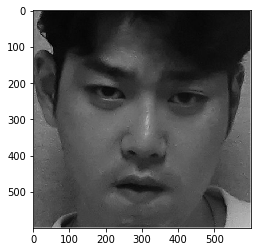

In [0]:
img = detect_face(ang_man_light_img[0])[0]
plt.imshow(img)

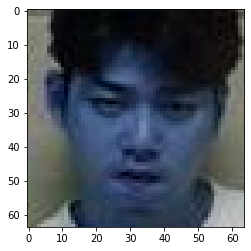

In [0]:
face = "G:/Python_Data/Senitment_data/000-ang-00.jpg"
ang_face = cv2.imread(face, cv2.COLOR_BGR2GRAY)
plt.imshow(dis_face)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


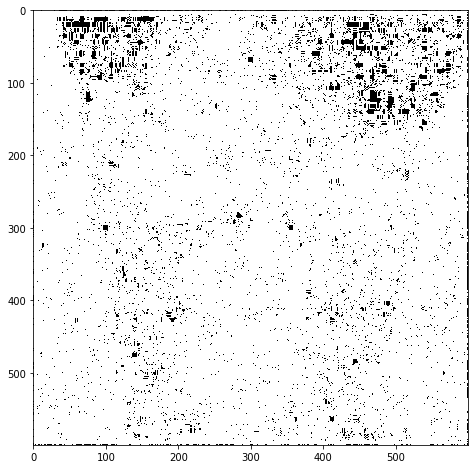

In [0]:
gx = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.figure(figsize=(12,8))
plt.imshow(mag)
plt.show()

In [0]:
x = ang_girl_light_img[0]
y = sur_girl_light_img[0]

In [0]:
x.shape

(600, 600, 3)

In [0]:
img = np.load("G:/Python_Data/Senitment_data/File/face_50_img.npy")